In [1]:
import numpy as np
import pandas as pd

# PART I. TRAIN SET

In [2]:
titanic = pd.read_csv('datasets/titanic/train.csv')

In [3]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Feature stage

In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Missing vals imputation

In [6]:
mv_cols = (titanic.isnull().sum())
print(mv_cols[mv_cols > 0])

Age         177
Cabin       687
Embarked      2
dtype: int64


In [8]:
titanic['Embarked'] = titanic['Embarked'].fillna('S')

In [9]:
titanic['Cabin'] = titanic['Cabin'].fillna('NA')

In [10]:
titanic['Age'] = titanic['Age'].fillna(titanic['Age'].median())

In [11]:
mv_cols = (titanic.isnull().sum())
print(mv_cols[mv_cols > 0])

Series([], dtype: int64)


### Basic feat engineering

In [15]:
titanic['Has_cabin'] = titanic['Cabin'].apply(lambda x: 0 if x == 'NA' else 1)

In [14]:
titanic['FamilySize'] = titanic['SibSp'] + titanic['Parch'] + 1

In [17]:
titanic['Is_alone'] = titanic['FamilySize'].apply(lambda x: 1 if x == 1 else 0)

In [19]:
titanic['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
figsize=(10,5)

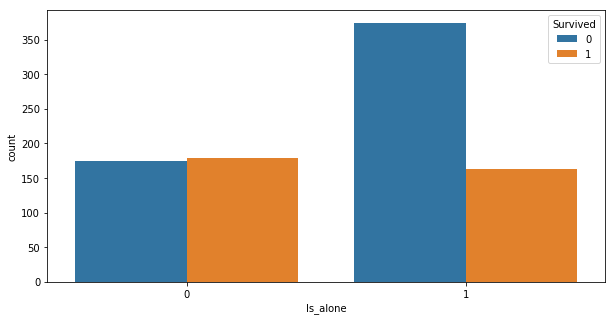

In [22]:
plt.figure(figsize=figsize)
sns.countplot(x='Is_alone', hue='Survived', data=titanic)
plt.show()

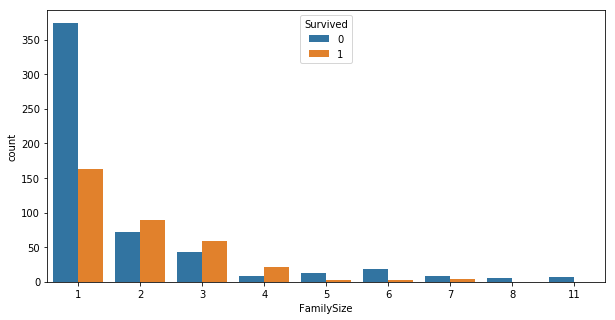

In [23]:
plt.figure(figsize=figsize)
sns.countplot(x='FamilySize', hue='Survived', data=titanic)
plt.show()

In [18]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Has_cabin,FamilySize,Is_alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NA,S,0,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,2,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NA,S,0,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,2,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NA,S,0,1,1


In [ ]:
unnecessary_cols = ['PassengerId','Name','Ticket','Cabin','SibSp','Parch']

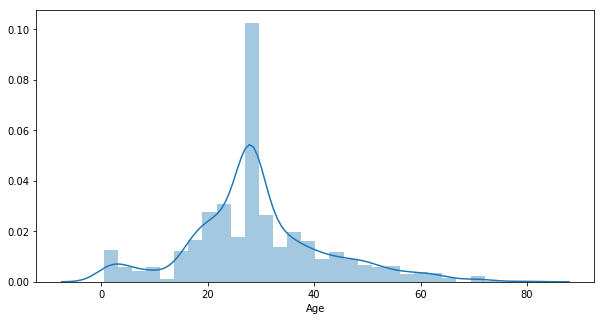

In [25]:
plt.figure(figsize=figsize)
sns.distplot(titanic['Age'])
plt.show()

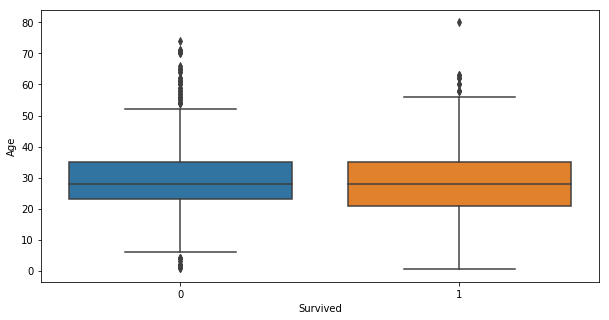

In [27]:
plt.figure(figsize=figsize)
sns.boxplot(x='Survived', y='Age', data=titanic)
plt.show()
#### presence of outliers!

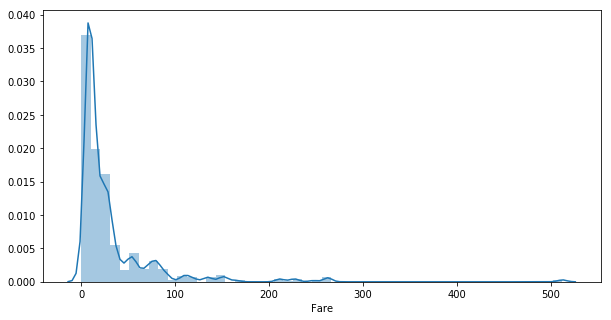

In [26]:
plt.figure(figsize=figsize)
sns.distplot(titanic['Fare'])
plt.show()

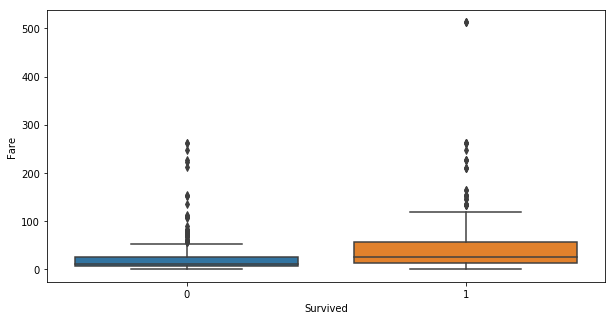

In [28]:
plt.figure(figsize=figsize)
sns.boxplot(x='Survived', y='Fare', data=titanic)
plt.show()
#### also presence of outliers! :-/

In [29]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler, PowerTransformer

In [33]:
ageScaler = RobustScaler()
titanic['Age_scaled'] = ageScaler.fit_transform(titanic['Age'].values.reshape(-1, 1))

In [ ]:
fareScaler = PowerTransformer()
titanic['Fare_scaled'] = 